<a href="https://colab.research.google.com/github/Catcereal/DeepLearning_Using_Python-Tensorflow-Keras-/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

케라스에서 MNIST 데이터셋 적재하기

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
len(test_labels)

10000

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

신경망 구조

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

컴파일 단계

In [8]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

이미지 데이터 준비

In [9]:
train_images = train_images.reshape((60000, 28 * 28)) #unsigned int 8byte -> 60000, 28, 28 인 배열로 저장
train_images = train_images.astype("float32") / 255   #-> float 32byte => 60000, 28, 28인 배영로 바꾼다.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

모델 훈련

In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8746 - loss: 0.4382
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9658 - loss: 0.1190
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9778 - loss: 0.0743
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9844 - loss: 0.0531
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9891 - loss: 0.0376


모델을 사용해 예측 만들기

In [11]:
test_digits=test_images[0:10]
predictions=model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([5.4287632e-09, 1.7422827e-10, 4.7566948e-07, 3.5155499e-06,
       1.3190573e-11, 7.3904789e-09, 2.7104425e-13, 9.9999493e-01,
       2.5931358e-08, 1.0536395e-06], dtype=float32)

In [12]:
predictions[0].argmax()

np.int64(7)

In [13]:
predictions[0][7]

np.float32(0.99999493)

In [14]:
test_labels[0]

np.uint8(7)

코드 2-7 새로운 데이터에서 모델 평가하기

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9754 - loss: 0.0789
test_acc: 0.9786999821662903


2.2 신경망을 위한 데이터 표현

스칼라(랭크-0 텐서)

In [16]:
import numpy as np
x = np.array(12)
x

array(12)

In [17]:
x.ndim

0

벡터(랭크-1 텐서)

In [18]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [19]:
x.ndim

1

랭크-3 텐서와 더 높은 랭크의 텐서

In [20]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [21]:
train_images.ndim

3

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
train_images.dtype

dtype('uint8')

8비트 정수형 랭크-3 텐서임을 알 수 있다.

28x28 크기의 정수 행렬 6만개가 있는 '배열'

행렬의 각 원소는 0~255 사이의 값을 가진다.

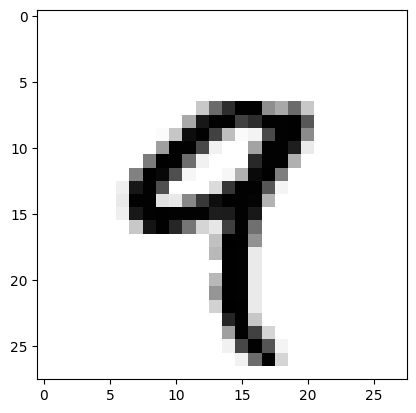

In [24]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [25]:
train_labels[4]

np.uint8(9)

넘파이로 텐서 조작하기

● 동일하지만 조금 더 자세한 표기법은 각 배열의 축을 따라 슬라이싱의 시작 인덱스와 마지막 인
덱스를 지정하는 것

● :(콜론)은 전체 인덱스를 선택

In [26]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [27]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [28]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

● 일반적으로 각 배열의 축을 따라 어떤 인덱스 사이도 선택할 수 있음

● 예를 들어 이미지의 오른쪽 아래 14×14 픽셀을 선택하려면 다음과 같이 함

In [29]:
my_slice = train_images[:, 14:, 14:]

In [30]:
my_slice = train_images[:, 7:-7, 7:-7]

배치 데이터

● 일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축(인덱스가 0부터 시작하므로 0
번째 축)은 샘플 축(sample axis)(이따금 샘플 차원(sample dimension)이라고도 부름)

딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다. 그 대신 데이터를 작은 **배치(batch)**로 나눈다.

**MNIST** 숫자 데이터에서 크기가 128인 배치 하나는 다음과 같다.

In [31]:
batch = train_images[:128]

In [32]:
# 다음 배치
batch = train_images[128:256]

In [33]:
# n번째 배치
n = 3
batch = train_images[128 * n: 128 * (n+1)]

배치 데이터를 다룰 때 첫 번째 축(0번 축)을 배치 축(batch axis) 또는 배치 차원(batch
dimension)이라고 부름

신경망의 톱니바퀴 : 텐서연산

원소별 연산

단순한 원소별 연산 구현 -> for 반복문으로 구현

In [34]:
#relu 연산
def naive_relu(x):
  assert len(x.shape) == 2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

In [35]:
#덧셈 연산
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

In [36]:
#실제 시간 차이를 재어보기
import numpy as np
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [37]:
#단순한 방법
t0 = time.time()
for _ in range(1000):
  z = naive_add(x, y)
  z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 2.21 s


##브로드캐스팅

In [38]:
import numpy as np

X = np.random.random((32, 10))
y = np.random.random((10,))

In [39]:
y = np.expand_dims(y, axis=0) # y의 크기가 (1, 10)이 된다고?

In [40]:
Y = np.concatenate([y] * 32, axis=0) # y를 이 축에 32번 반복 -> y의 크기 : (32, 10)

In [41]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x

In [42]:
import numpy as np

x = np.random.random((64, 3, 32, 10)) # x는 (64,3,32,10) 크기의 랜덤 텐서
y = np.random.random((32, 10))  # y는 (32,10)
z = np.maximum(x, y)

##텐서 곱셈

점곱 연산

In [43]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [44]:
def naive_vector_dot(x, y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

In [45]:
#2개의 벡터 x와 y의 점곱 계산

def naive_vector_dot(x, y):
  assert len(x.shape) == 1  # x, y는 넘파이 벡터
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]
  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

In [46]:
#행렬 x와 벡터 y 사이에서의 점곱 계산
#y와 x의 행 사이에서 점곱이 일어나기에 '벡터'가 반환된다.

def naive_matrix_vector_dot(x, y):
  assert len(x.shape)==2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0] #x의 두번째 차원이 y의 첫번째 차원과 같아야 한다.
  z = np.zeros(x.shape[0])  # x의 행과 같은 크기의 0이 채워진 벡터를 만든다.
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
  return z

In [47]:
# 행렬-벡터 점곱은 더 단순하게 표현하자면
def naive_matrix_vector_dot2(x, y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i, :], y)
  return z

In [48]:
# 두 행렬간의 점곱

def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0] # x의 두번재 차원이 y의 첫번쨰 차원과 같아야 한다.
  z = np.zeros((x.shape[0], y.shape[1]))  # 0이 채워진 특정 크기의 벡터를 만든다.
  for i in range(x.shape[0]): # x의 행을 반복
    for j in range(y.shape[1]): # y의 열을 반복
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, column_y)
  return z

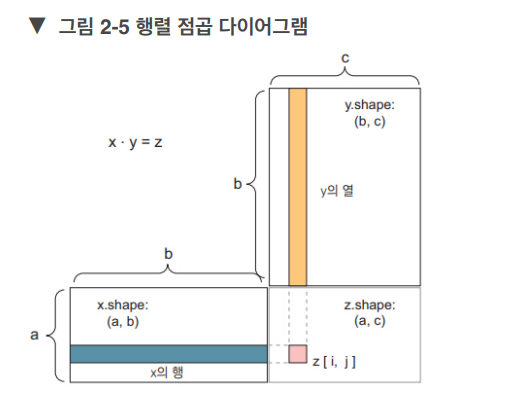

##텐서크기변환

모델에 주입할 숫자 데이터를 전처리 할 때 사용

In [49]:
train_images = train_images.reshape((60000, 28*28))

In [50]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])

In [51]:
x.shape

(3, 2)

In [52]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [53]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [54]:
# 전치

x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

##도함수의 연결: 역전파 알고리즘

미적분의 연쇄 법칙을 사용 -> 연결된 함수의 도함수를 구함.

fg(x) == f(g(x))
def fg(x):

  x1 = g(x)
  
  y1 = f(x1)

  return y

##Gradient Tape 최적화

자동 미분 기능 API

In [55]:
import tensorflow as tf

x = tf.Variable(0.) #초기값 0으로 스칼라 변수를 생성합니다.
with tf.GradientTape() as tape: #GradientTape 컨텍스트 안에서 연산을 기록합니다.
  y = 2 * x + 3 # 연산을 기록합니다.
grad_of_y_wrt_x = tape.gradient(y, x) #y에 대한 x의 도함수를 계산합니다.

In [56]:
x = tf.Variable(tf.zeros((2,2)))  #초기값이 0인 2x2 행렬(변수)을 생성합니다.
with tf.GradientTape() as tape:
  y = 2 * x + 3
  grad_of_y_wrt_x = tape.gradient(y, x)
  # grad_of_wrt_x는 (x와 크기가 같은) (2, 2) 크기의 텐서로
  # x = [[0, 0], [0, 0]]일 떄 y = 2 * x + 3의 곡률을 나타낸다.


In [57]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2, )))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
  y = tf.matmul(x, W) + b # matmul은 텐서플로의 점곱 함수입니다.
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])
# grad_of_y_wrt_W_and_b는 2개의 텐서를 담은 리스트이다.
# 각 텐서는 W, b와 크기가 같습니다.

##첫 번째 예제 다시 살펴보기

이미지 데이터 준비하기

In [58]:
# 입력 데이터 받고
# 훈련 데이터는 (60000, 28 * 28) 크기의 넘파이 배열로 저장
# 테스트 데이터는 (10000, 28 * 28) 크기의 넘파이 배열로 저장
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

신경망 구조 모델

In [59]:
# 모델 구현
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
# 2개의 Dense 층이 연결되어있고 각 층은 가중치 텐서를 포함해 입력 데이터에 대한
# 몇 개의 간단한 텐서 연산을 적용
# 층의 속성인 가중치 텐서는 모델이 정보를 저장하는 곳

컴파일 단계

In [60]:
# 모델을 컴파일하는 단계
model.compile(optimizer="rmsprop",  # 옵티마이저
              loss="sparse_categorical_crossentropy", # 손실함수
              # 가중치 텐서를 학습하기 위한 피드백 신호로 사용.
              metrics=["accuracy"])

모델 훈련

In [61]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8779 - loss: 0.4290
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9672 - loss: 0.1110
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9786 - loss: 0.0721
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9853 - loss: 0.0484
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9885 - loss: 0.0398


##텐서플로를 사용해 첫 번째 예제를 밑바닥부터 다시 구현하기

구현을 통해서 fit() 메서드를 이해하고, 케라스 API에서 제공하는 고수준의 기능을 더 잘 활용할 수 있다

###단순한 Dense 클래스

Dense 층

**output = activation(dot(W, input) + b)**

**W**와 **b**는 **model parameter**

**activation**은 각 원소에 적용되는 함수
(일반적으로 **relu**, 마지막 층에서는 **softmax** 사용)

In [62]:
import tensorflow as tf

class NaiveDense:
  def __init__(self, input_size, output_size, activation):
    self.activation = activation

    w_shape = (input_size, output_size)
    w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
    # 랜덤한 값으로 초기화된 (input_size, output_size) 크기의 행렬 W를 만든다.
    self.W = tf.Variable(w_initial_value)

    b_shape = (output_size, ) # 0으로 초기화된(output_size, ) 크기의 벡터 b를 만든다.
    b_initial_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_value)

  def __call__(self, inputs): # 정방향 패스를 수행
    return self.activation(tf.matmul(inputs, self.W) + self.b)

  @property
  def weights(self):  # 층의 가중치를 추출하기 위한 매서드
    return [self.W, self.b]

###단순한 Sequential 클래스

In [63]:
class NaiveSequential:
  def __init__(self, layers):
    self.layers = layers

  def __call__(self, inputs):
    x = inputs
    for layer in self.layers:
      x = layer(x)
    return x

  @property
  def weights(self):
    weights = []
    for layer in self.layers:
      weights += layer.weights
    return weights

In [64]:
# NaiveDense와 NaiveSequential 클래스를 사용해 케라스와 유사한 모델을 구현
model = NaiveSequential([
    NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

keras와 비교했을 때 numpy로 구현하는 것이 더 복잡하다

###배치 제너레이터

In [65]:
import math

class BatchGenerator:
  def __init__(self, images, labels, batch_size=128):
    assert len(images) == len(labels)
    self.index = 0
    self.images = images
    self.labels = labels
    self.batch_size = batch_size
    self.num_batches = math.ceil(len(images) / batch_size)

  def next(self):
    images = self.images[self.index : self.index + self.batch_size]
    labels = self.labels[self.index : self.index + self.batch_size]
    self.index += self.batch_size
    return images, labels

###훈련 스텝 실행하기

In [66]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

수동으로 구현하는 가중치 업데이트 단계

In [67]:
learning_rate = 1e-3

def update_weights(gradients, weights):
  for g, w in zip(gradients, weights):
    w.assign_sub(g * learning_rate) # -= 연산과 동일한 메서드

케라스의 Optimizer 인스턴스를 활용한 가중치 업데이트

In [68]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
  optimizer.apply_gradients(zip(gradients, weights))

###전체 훈련 루프

In [69]:
def fit(model, images, labels, epochs, batch_size=128):
  for epoch_counter in range(epochs):
    print(f"에포크 {epoch_counter}")
    batch_generator = BatchGenerator(images, labels)
    for batch_counter in range(batch_generator.num_batches):
      images_batch, labels_batch = batch_generator.next()
      loss = one_training_step(model, images_batch, labels_batch)
      if batch_counter % 100 == 0:
        print(f"배치 {batch_counter}번째 손실: {loss:.2f}")

In [70]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
배치 0번째 손실: 4.58
배치 100번째 손실: 2.25
배치 200번째 손실: 2.22
배치 300번째 손실: 2.10
배치 400번째 손실: 2.25
에포크 1
배치 0번째 손실: 1.90
배치 100번째 손실: 1.89
배치 200번째 손실: 1.84
배치 300번째 손실: 1.72
배치 400번째 손실: 1.85
에포크 2
배치 0번째 손실: 1.58
배치 100번째 손실: 1.59
배치 200번째 손실: 1.52
배치 300번째 손실: 1.44
배치 400번째 손실: 1.53
에포크 3
배치 0번째 손실: 1.32
배치 100번째 손실: 1.36
배치 200번째 손실: 1.25
배치 300번째 손실: 1.22
배치 400번째 손실: 1.29
에포크 4
배치 0번째 손실: 1.12
배치 100번째 손실: 1.17
배치 200번째 손실: 1.06
배치 300번째 손실: 1.06
배치 400번째 손실: 1.12
에포크 5
배치 0번째 손실: 0.98
배치 100번째 손실: 1.03
배치 200번째 손실: 0.91
배치 300번째 손실: 0.93
배치 400번째 손실: 1.00
에포크 6
배치 0번째 손실: 0.87
배치 100번째 손실: 0.92
배치 200번째 손실: 0.81
배치 300번째 손실: 0.84
배치 400번째 손실: 0.91
에포크 7
배치 0번째 손실: 0.79
배치 100번째 손실: 0.84
배치 200번째 손실: 0.73
배치 300번째 손실: 0.77
배치 400번째 손실: 0.84
에포크 8
배치 0번째 손실: 0.72
배치 100번째 손실: 0.77
배치 200번째 손실: 0.67
배치 300번째 손실: 0.71
배치 400번째 손실: 0.78
에포크 9
배치 0번째 손실: 0.67
배치 100번째 손실: 0.72
배치 200번째 손실: 0.62
배치 300번째 손실: 0.67
배치 400번째 손실: 0.74


###모델 평가하기

In [71]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.81
